#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step-1: Reading and Understanding the Dataset

In [1]:
# Importing the required Libraries

# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Statsmodels for Regression Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress Warnings for Clean Output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset from CSV file
bike_data = pd.read_csv("day.csv")

In [3]:
# Display the first few records of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Get the number of rows and columns in the dataset
bike_data.shape

(730, 16)

In [5]:
# Summarizing statistical details of the dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Display dataset structure and column details
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for missing values in each column
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Renaming columns for enhanced clarity
bike_data.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

In [9]:
# Display the updated dataset's first few records
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Create a duplicate of the dataset for manipulation
bike_data_copy = bike_data.copy()

In [11]:
# Check the dimensions of the copied dataset
bike_data_copy.shape

(730, 16)

In [12]:
# Remove duplicate entries from the dataset
bike_data_copy.drop_duplicates(inplace=True)

In [13]:
# Confirming the dimensions of the dataset after duplicates are removed
bike_data_copy.shape

(730, 16)

##### Since the shape remains unchanged after removing duplicates, the original dataset had no duplicates.

In [14]:
# Removing unnecessary columns
# 'instant' is just an index, 'dteday' can be inferred from 'year' and 'month',
# 'casual' and 'registered' are detailed breakdowns, which can be represented by 'cnt'.
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [15]:
# Mapping the 'season' column to corresponding season names
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [16]:
# Mapping the 'month' column to month abbreviations
bike_data['month'] = bike_data['month'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

In [17]:
# Mapping the 'weekday' column to weekday abbreviations
bike_data['weekday'] = bike_data['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

In [18]:
# Mapping the 'weathersit' column to weather conditions
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light_snowrain', 4: 'Heavy_snowrain'})

In [19]:
# Display the first few records of the modified dataset
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Display column information of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [21]:
# Summarizing statistical details of the modified dataset
bike_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualising the Data

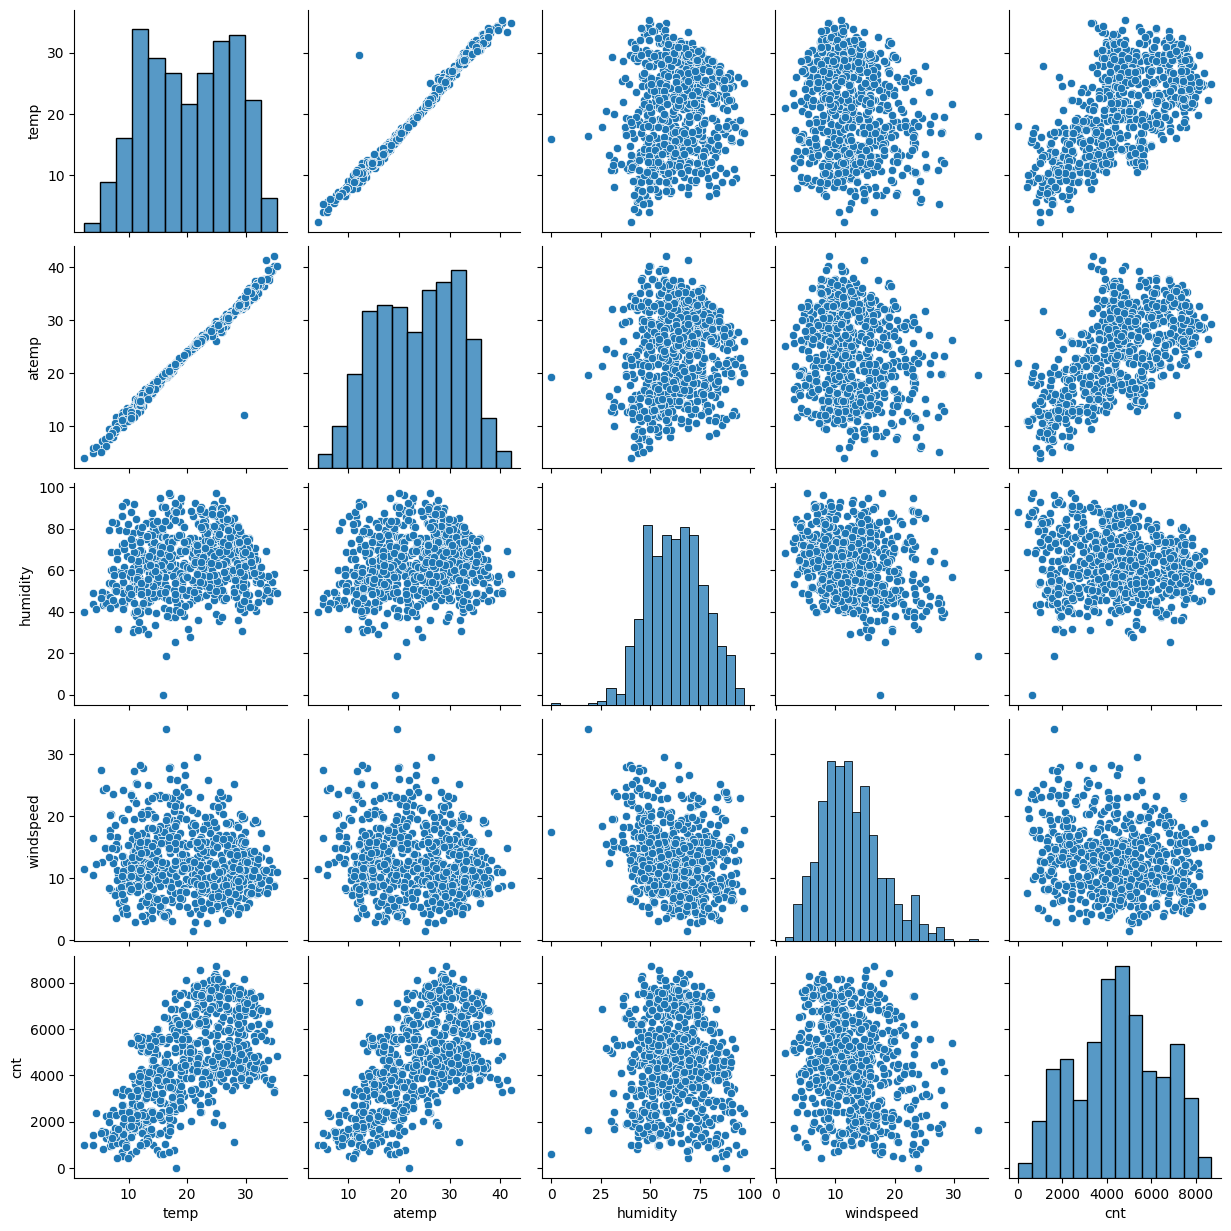

In [22]:
# Analyzing and visualizing the numerical columns
sns.pairplot(bike_data, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

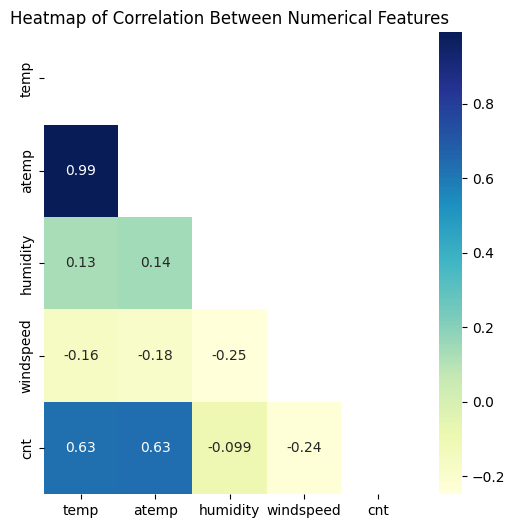

In [23]:
# Visualizing correlation among numerical features
plt.figure(figsize=(6, 6))
correlation_matrix = np.triu(bike_data[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr())
sns.heatmap(bike_data[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot=True, cmap="YlGnBu", mask=correlation_matrix)
plt.title("Heatmap of Correlation Between Numerical Features")
plt.show()

#### - There's a linear relationship between 'temp' and 'atemp'. To avoid multicollinearity, we need to determine which variables to retain.
#### - We will evaluate the variables based on their VIF and p-values relative to other features.


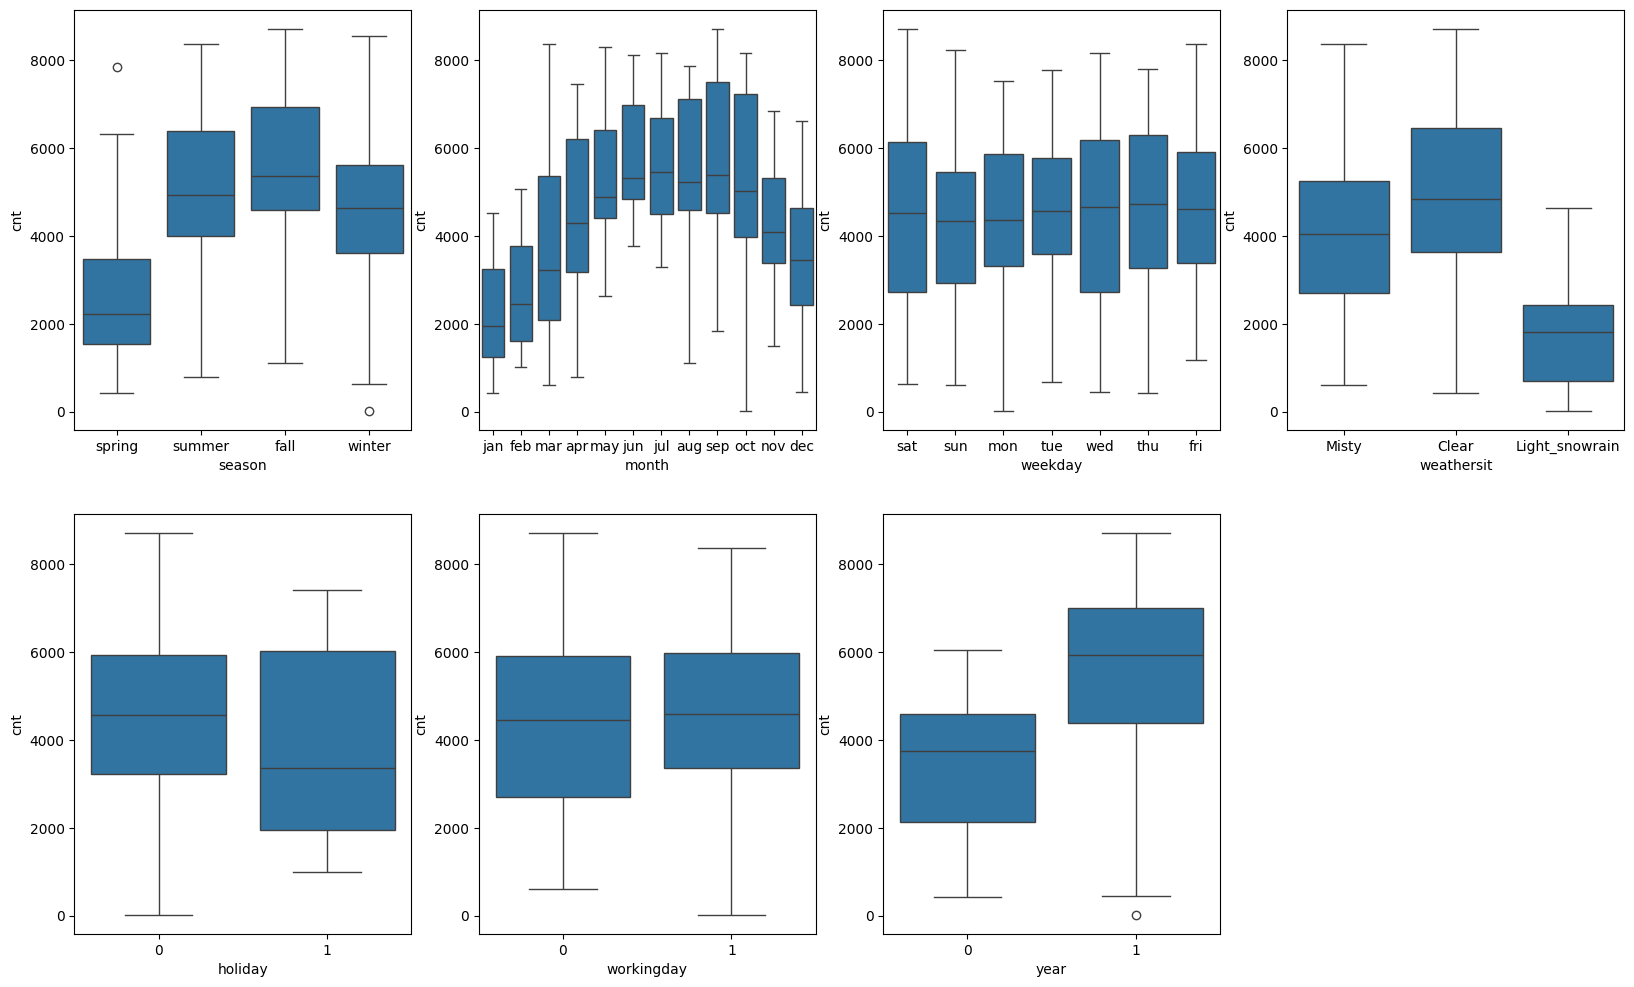

In [24]:
# Visualizing the relationship between categorical predictors and the target variable
plt.figure(figsize=(20, 12))

# Creating boxplots for various categorical variables vs target 'cnt'
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_data)

plt.subplot(2, 4, 2)
sns.boxplot(x='month', y='cnt', data=bike_data)

plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bike_data)

plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike_data)

plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=bike_data)

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_data)

plt.subplot(2, 4, 7)
sns.boxplot(x='year', y='cnt', data=bike_data)

plt.show()

In [25]:
# Function to generate bar plots for categorical variables and their relationship with the target
def plot_categorical_features(column):
    plt.figure(figsize=(12, 6))
    
    # Bar plot for target variable 'cnt' vs categorical column
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_data)
    
    # Bar plot with 'year' as a hue to show year-wise variations
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_data, hue='year', palette='Set1')
    plt.legend(labels=['2018', '2019'])
    
    plt.show()

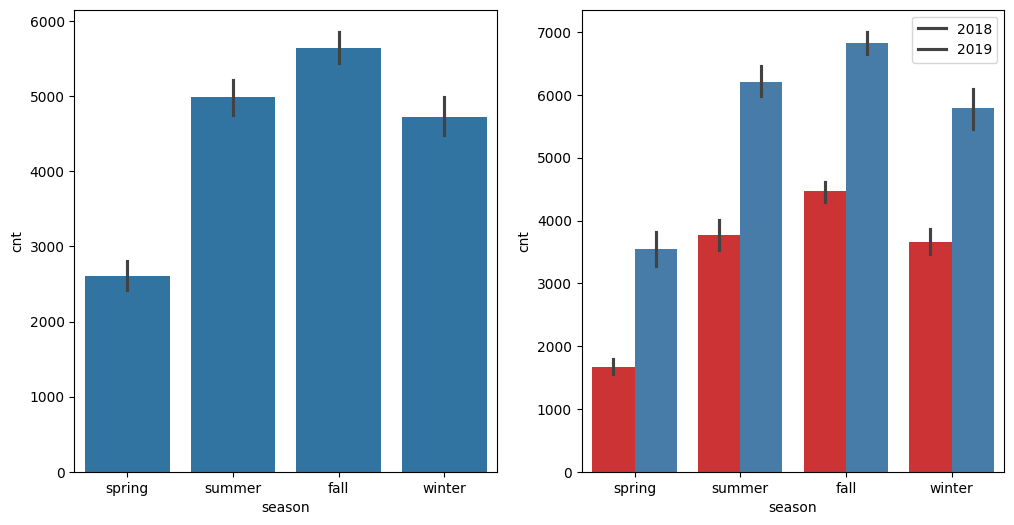

In [26]:
# Visualizing the relationship for the 'season' column using the custom function
plot_categorical_features('season')

#### Observations:
##### The 'Fall' season appears to have the highest number of bookings.
##### Additionally, there's a significant increase in booking counts from 2018 to 2019 across all seasons.

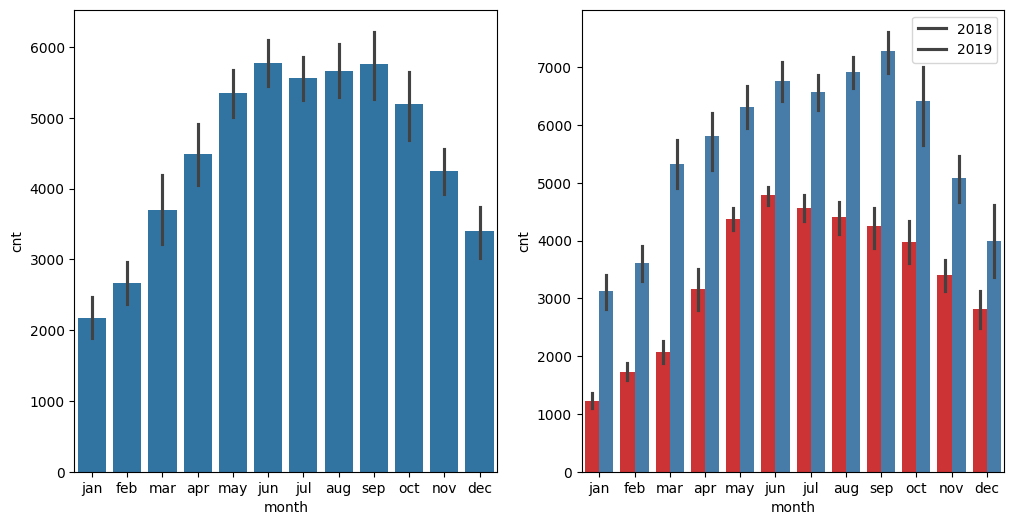

In [27]:
# Visualizing the relationship for the 'month' column using the custom function
plot_categorical_features('month')

#### Insights:
##### The highest number of bookings occurred between May and October, with a noticeable peak in the summer months.
##### The booking trend increased throughout the first half of the year and then declined as the year progressed.
##### Additionally, booking numbers showed a rise from 2018 to 2019 for each month.

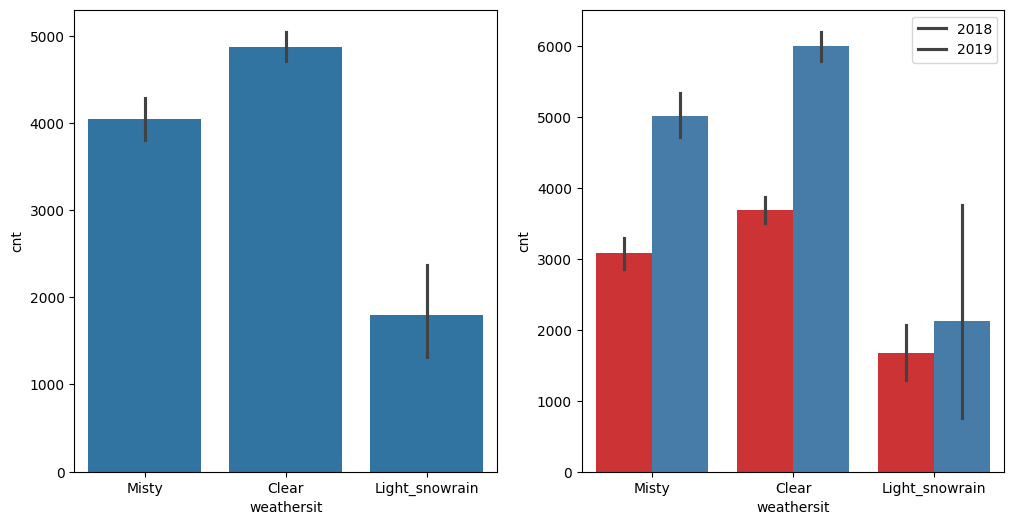

In [28]:
# Visualizing the relationship for the 'weathersit' column using the custom function
plot_categorical_features('weathersit')

#### Observations:
##### Clear weather resulted in the highest number of bookings, which is expected.
##### In comparison to 2018, bookings increased across all weather conditions in 2019.

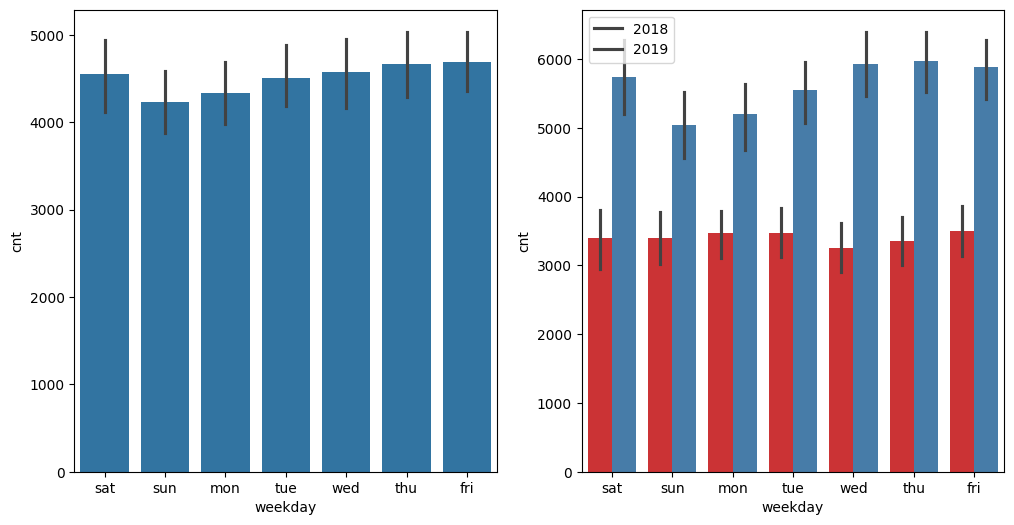

In [29]:
# Visualizing the relationship for the 'weekday' column using the custom function
plot_categorical_features('weekday')

#### Insights:
##### Bookings are higher towards the end of the week (Thursday to Sunday) compared to the beginning of the week.

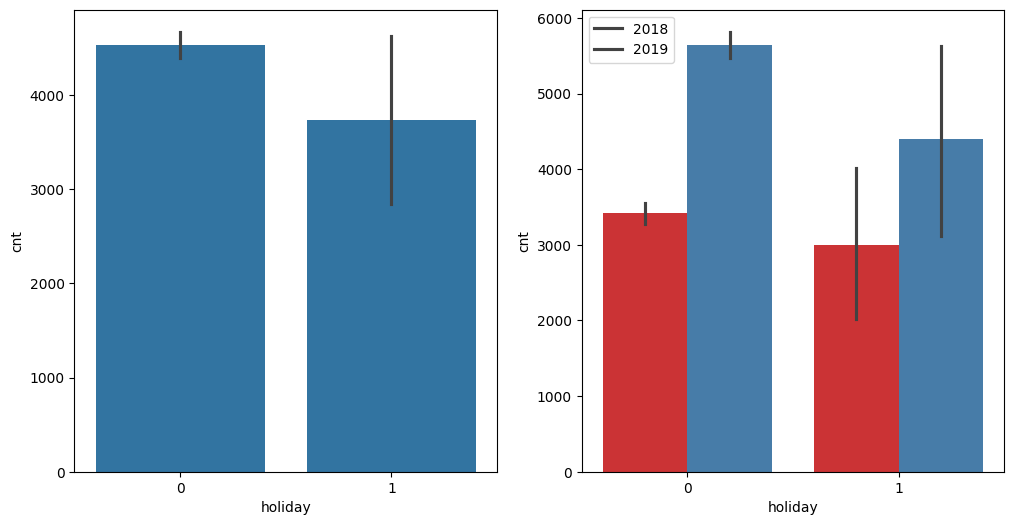

In [30]:
# Visualizing the relationship for the 'holiday' column using the custom function
plot_categorical_features('holiday')

#### Insights:
##### Bookings tend to be lower on non-holiday days, which is reasonable as people may prefer spending time at home with family on holidays.

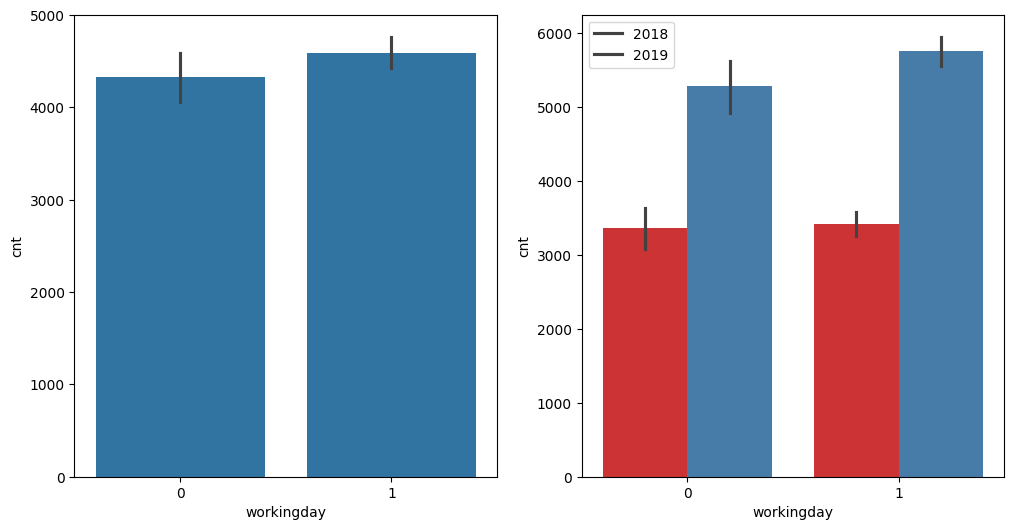

In [31]:
# Visualizing the relationship for the 'workingday' column using the custom function
plot_categorical_features('workingday')

#### Insights:
##### The number of bookings appears to be almost the same on working days and non-working days.
##### However, there was a noticeable increase in bookings from 2018 to 2019.

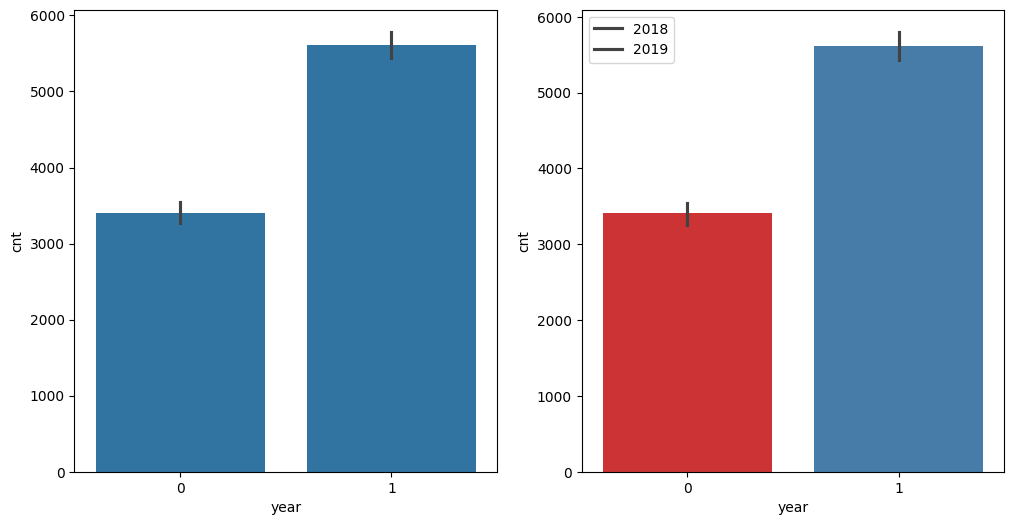

In [32]:
# Visualizing the relationship for the 'year' column using the custom function
plot_categorical_features('year')

#### Insights:
##### The year 2019 saw a higher number of bookings compared to 2018, indicating positive growth in the business.

## Step-2: Preparing the Data for Modelling

- Encoding
    - Converting binary var 1/0
    - Other categorical vars to dummy vars
- Splitting in Test and Train data
- Rescaling of variable

#### Dummy Variables

In [33]:
# Creating dummy variables for the categorical columns 'month', 'weekday', 'weathersit', and 'season'
months_df = pd.get_dummies(bike_data.month, drop_first=True).astype(int)
weekdays_df = pd.get_dummies(bike_data.weekday, drop_first=True).astype(int)
weathersit_df = pd.get_dummies(bike_data.weathersit, drop_first=True).astype(int)
seasons_df = pd.get_dummies(bike_data.season, drop_first=True).astype(int)

In [34]:
# Checking the first few rows of the dataframe
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# Merging the original dataframe with the dummy variable datasets
bike_data_new = pd.concat([bike_data, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [36]:
# Checking the first few rows of the merged dataframe
bike_data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [37]:
# Checking the info of the merged dataframe
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int64  
 13  dec             730 non-null    int64  
 14  feb             730 non-null    int64  
 15  jan             730 non-null    int64  
 16  jul             730 non-null    int64  
 17  jun             730 non-null    int

In [38]:
# Dropping the original categorical columns as we have created dummy variables for them
bike_data_new.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

In [39]:
# Checking the first few rows of the updated dataframe
bike_data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [40]:
# Checking the shape of the updated dataframe
bike_data_new.shape

(730, 30)

In [41]:
# Checking the info of the updated dataframe
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int64  
 9   dec             730 non-null    int64  
 10  feb             730 non-null    int64  
 11  jan             730 non-null    int64  
 12  jul             730 non-null    int64  
 13  jun             730 non-null    int64  
 14  mar             730 non-null    int64  
 15  may             730 non-null    int64  
 16  nov             730 non-null    int64  
 17  oct             730 non-null    int

### Splitting the Data into Training and Testing Sets

In [42]:
# Splitting the dataset into training and testing sets
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data_new, train_size=0.7, random_state=100)

# Checking the shape of the training dataset
print(bike_data_train.shape)

# Checking the shape of the testing dataset
print(bike_data_test.shape)

(510, 30)
(220, 30)


#### Rescaling the variables

In [43]:
# Using MinMaxScaler to rescale the features
scaler = MinMaxScaler()

# Verifying the head of the training dataset before scaling
bike_data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
# Applying the MinMaxScaler to numerical columns (excluding 'yes-no' and 'dummy' variables)
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

# Verifying the head of the training dataset after scaling
bike_data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
# Describing the training dataset
bike_data_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


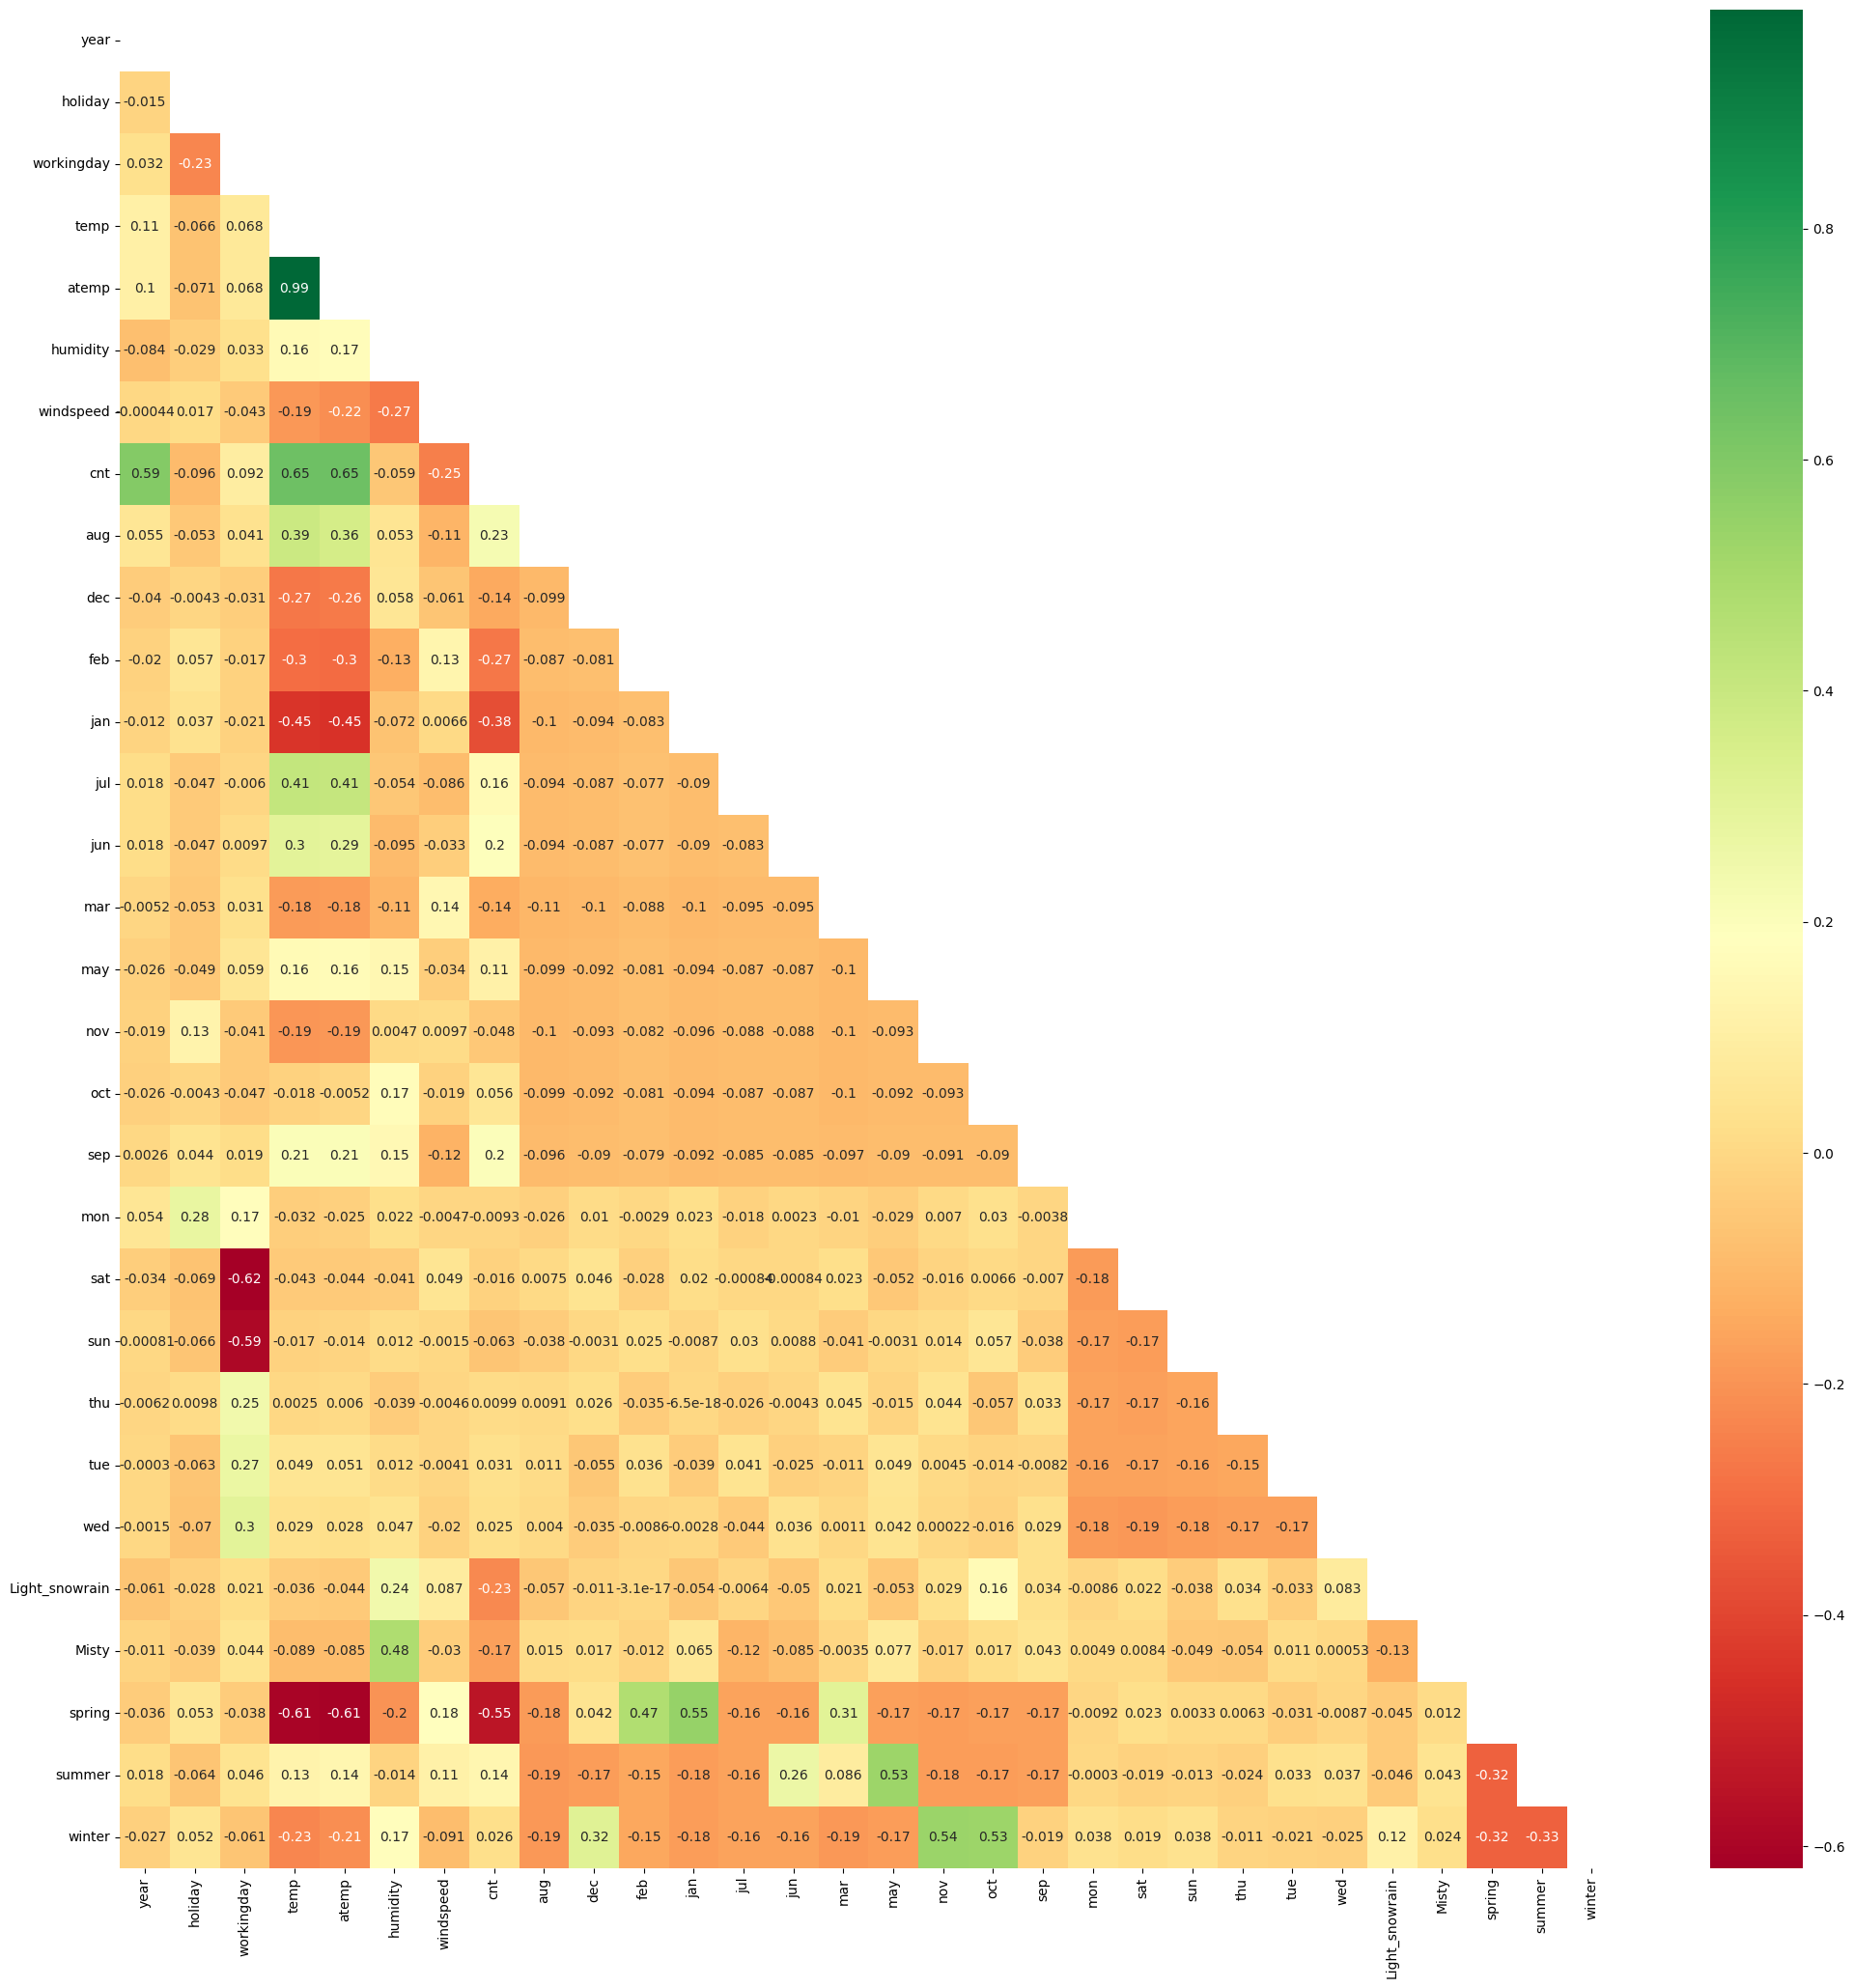

In [46]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25, 25))
matrix = np.triu(bike_data_train.corr())
sns.heatmap(bike_data_train.corr(), annot=True, cmap="RdYlGn", mask=matrix)
plt.show()

#### Observations:
##### - **cnt** (bike demand) appears to be correlated with the **year** variable and **temp** (temperature).
##### - **Misty** weather condition has a strong correlation with **humidity**.
##### - The **Spring** season correlates with **January** and **February**.
##### - The **Summer** season is closely correlated with **May**.
##### - **Winter** season is strongly associated with **October** and **November**.

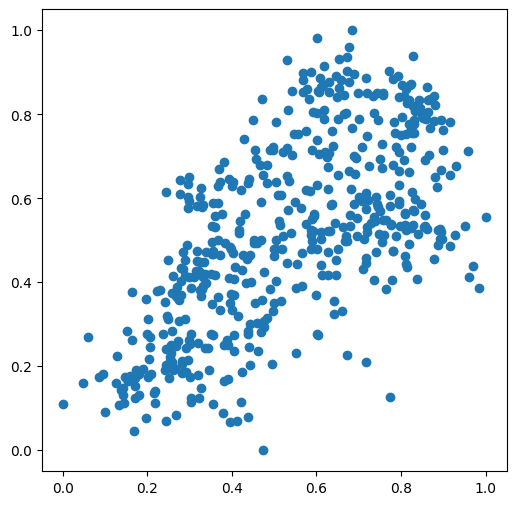

In [47]:
# Visualizing the correlation between temperature and bike demand using a scatter plot
plt.figure(figsize=[6,6])
plt.scatter(bike_data_train.temp, bike_data_train.cnt)
plt.show()

##### The scatter plot indeed validates the positive correlation between temperature (temp) and bike demand (cnt). 
##### As the temperature increases, bike demand seems to rise as well.

## Step-3: Training the Model

In [48]:
# Building the Linear Model

y_train = bike_data_train.pop('cnt')
X_train = bike_data_train

In [49]:
# Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Initialize the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Apply RFE for feature selection, specifying the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [50]:
# List of variables selected in the top 15 list
selected_variables = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Displaying the list
for feature, selected, ranking in selected_variables:
    print(f"Feature: {feature}, Selected: {selected}, Ranking: {ranking}")

Feature: year, Selected: True, Ranking: 1
Feature: holiday, Selected: True, Ranking: 1
Feature: workingday, Selected: False, Ranking: 2
Feature: temp, Selected: True, Ranking: 1
Feature: atemp, Selected: False, Ranking: 7
Feature: humidity, Selected: True, Ranking: 1
Feature: windspeed, Selected: True, Ranking: 1
Feature: aug, Selected: False, Ranking: 9
Feature: dec, Selected: False, Ranking: 5
Feature: feb, Selected: False, Ranking: 6
Feature: jan, Selected: False, Ranking: 3
Feature: jul, Selected: True, Ranking: 1
Feature: jun, Selected: False, Ranking: 16
Feature: mar, Selected: False, Ranking: 17
Feature: may, Selected: False, Ranking: 8
Feature: nov, Selected: False, Ranking: 4
Feature: oct, Selected: False, Ranking: 15
Feature: sep, Selected: True, Ranking: 1
Feature: mon, Selected: False, Ranking: 11
Feature: sat, Selected: True, Ranking: 1
Feature: sun, Selected: False, Ranking: 10
Feature: thu, Selected: False, Ranking: 13
Feature: tue, Selected: False, Ranking: 12
Feature: 

In [51]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'jul', 'sep', 'sat',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [52]:
# checking which columns have been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### VIF - Variance Inflation Factor

###### VIFi = 1/(1-R2)
###### If VIF = 5 then,
###### 1-R2 = 0.2
###### R2 = o.8

##### Which is really High

In [53]:
# Function to compute VIF for selected features

def compute_vif(dataset):
    vif = pd.DataFrame()
    vif['Feature'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [54]:
# Creating a new dataframe with the selected features based on RFE
X_train_rfe = X_train[list(col)]

In [55]:
# Calculate VIF for the selected features in the training set after RFE
vif_df = compute_vif(X_train_rfe)
vif_df

,Feature,VIF
3,humidity,28.03
2,temp,16.06
4,windspeed,4.67
10,spring,4.03
12,winter,3.35
11,summer,2.79
9,Misty,2.28
0,year,2.08
5,jul,1.58
6,sep,1.39


##### The feature `humidity` has a high Variance Inflation Factor (VIF) value. 

### Building a Linear Model

#### 1st Linear Regression Model

In [56]:
# Adding a constant to the model
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Fitting the linear regression model using OLS (Ordinary Least Squares)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

# Displaying the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          1.31e-189
Time:                        14:22:37   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2803      0.035      8.

In [57]:
# Dropping 'humidity' due to high VIF values
X_train_new = X_train_rfe.drop(['humidity'], axis=1)

# Recalculating the VIF for the new set of features
compute_vif(X_train_new)

,Feature,VIF
2,temp,5.12
3,windspeed,4.62
10,summer,2.23
9,spring,2.10
0,year,2.07
11,winter,1.79
4,jul,1.58
8,Misty,1.55
5,sep,1.34
6,sat,1.19


##### The feature `temp` has a high Variance Inflation Factor (VIF) value. 

#### 2nd Linear Regression Model

In [58]:
# Building 2nd linear regression model after removing 'humidity'
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

# Displaying the summary of the new model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          1.68e-186
Time:                        14:22:37   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1960      0.030      6.

In [59]:
# Dropping 'jul' due to high p-values values
X_train_new = X_train_new.drop(['jul'], axis=1)

# Recalculating the VIF for the new set of features
compute_vif(X_train_new)

,Feature,VIF
3,windspeed,4.62
2,temp,3.87
0,year,2.07
8,spring,2.01
9,summer,1.90
10,winter,1.64
7,Misty,1.55
4,sep,1.23
5,sat,1.19
6,Light_snowrain,1.08


#### 3rd Linear Regression Model

In [60]:
# Building 3rd linear regression model after removing 'temp' due to its high VIF value
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

# Displaying the summary of the new model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          5.55e-186
Time:                        14:22:37   Log-Likelihood:                 496.34
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     498   BIC:                            -917.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1874      0.030      6.

#### - VIF value now seems to be good as it came below 5 and the p-value also has been dropped down nearing to 0. 
#### - Thus, the final model **lr_3** is considered robust, exhibiting low multicollinearity among predictors, with all p-values being statistically significant. The F-statistic of 226.9, coupled with a p-value approaching zero, confirms the overall significance of the model.

In [61]:
# Inspecting the coefficients and their corresponding parameter values

lr_3_coefficients = lr_3.params
print(lr_3_coefficients)

const             0.187385
year              0.234552
holiday          -0.093017
temp              0.479002
windspeed        -0.150100
sep               0.090925
sat               0.019467
Light_snowrain   -0.285477
Misty            -0.078823
spring           -0.055154
summer            0.062522
winter            0.094456
dtype: float64


## Step-4: Residual Analysis of Train Data and Analysis

In [62]:
# X_train_lm_3: This is the training data after applying feature selection and scaling,
# which has been prepared for fitting the model.

# Displaying the model features after preprocessing and ready for training
X_train_lm_3

,const,year,holiday,temp,windspeed,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,1,0,1,0


In [63]:
# Predicting the target variable 'cnt' using the trained model (lr_3)
# X_train_lm_3 contains the features after preprocessing, and we are using them to make predictions
y_train_pred = lr_3.predict(X_train_lm_3)

# Displaying the predicted values
y_train_pred

576    0.772675
426    0.481007
728    0.384655
482    0.586338
111    0.279549
         ...   
578    0.807692
53     0.212568
350    0.276566
79     0.313165
520    0.639169
Length: 510, dtype: float64

#### Normality of error terms

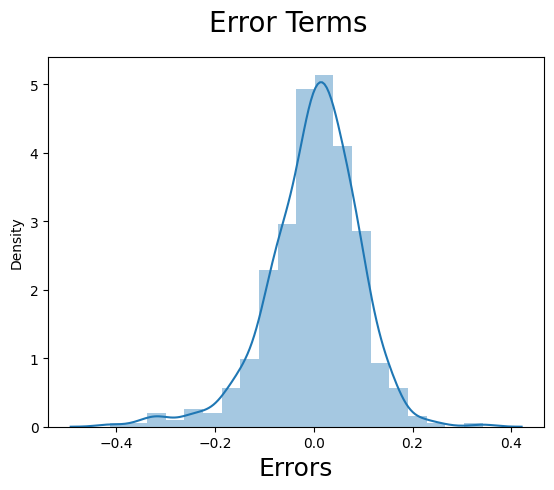

In [64]:
# Plotting the histogram of the error terms (difference between actual and predicted values)

# Calculate the residuals (errors) between actual values and predicted values
errors = y_train - y_train_pred

fig = plt.figure()
sns.distplot(errors, bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

##### The error terms appear to follow a normal distribution, which is a good indicator that the model's residuals are well-behaved. This suggests that the assumptions of linear regression, such as homoscedasticity and normality of residuals, are likely satisfied.

#### Multi Collinearity

In [65]:
# Computing the Variance Inflation Factor (VIF) for the selected variables in the dataset
compute_vif(X_train_new)

,Feature,VIF
3,windspeed,4.62
2,temp,3.87
0,year,2.07
8,spring,2.01
9,summer,1.90
10,winter,1.64
7,Misty,1.55
4,sep,1.23
5,sat,1.19
6,Light_snowrain,1.08


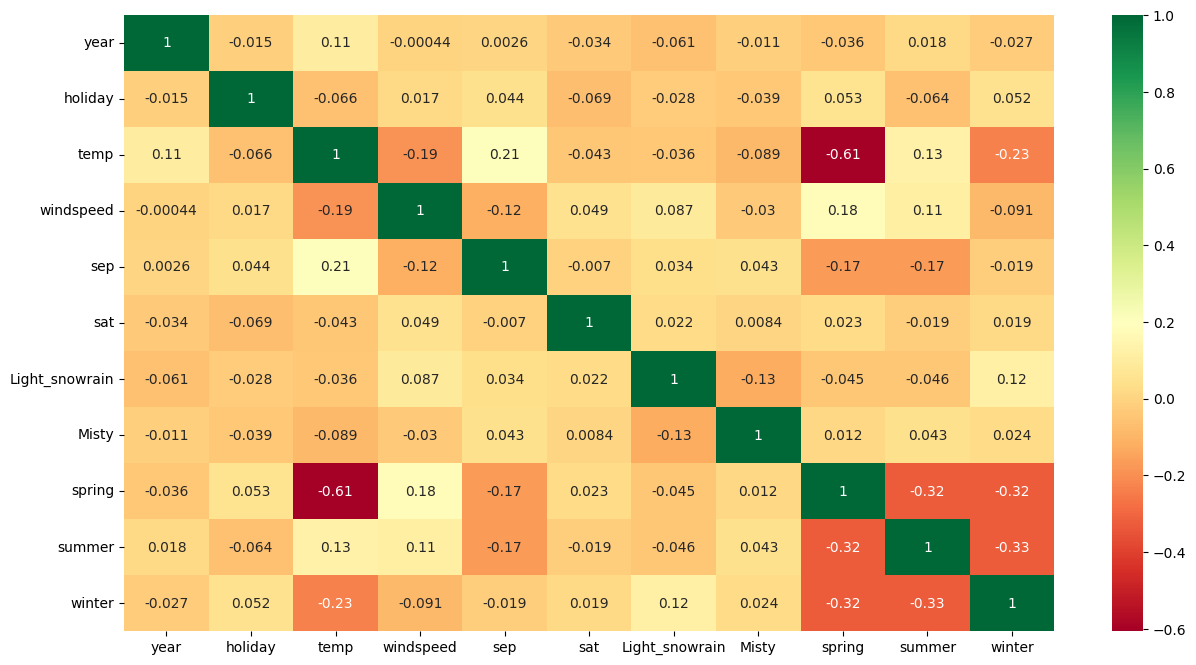

In [66]:
# Set the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Generate a heatmap to visualize correlations between features in the training set
sns.heatmap(X_train_new.corr(), annot=True, cmap="RdYlGn")
plt.show()

##### The VIF values are below 5, indicating no multicollinearity issues, which is further confirmed by the heatmap showing weak correlations between the predictors.

#### Linearity

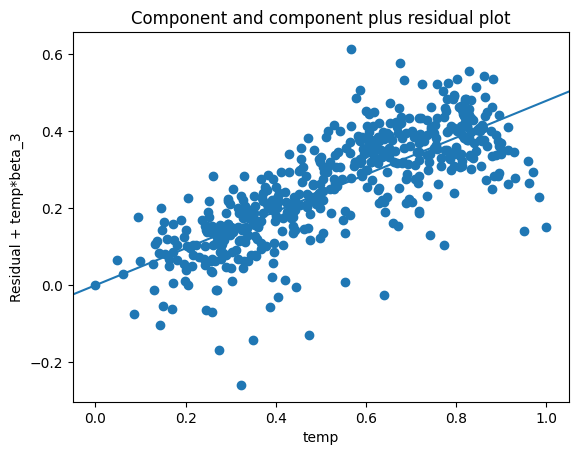

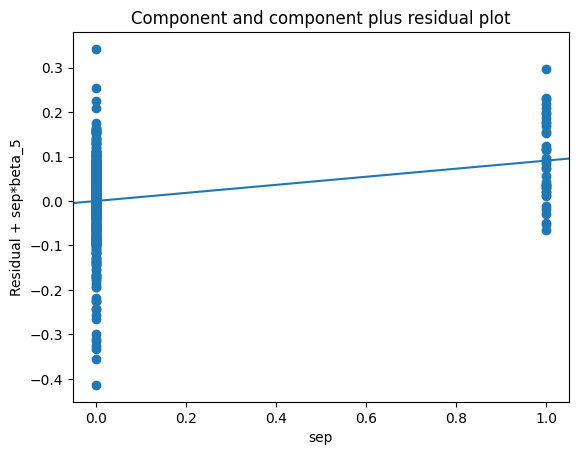

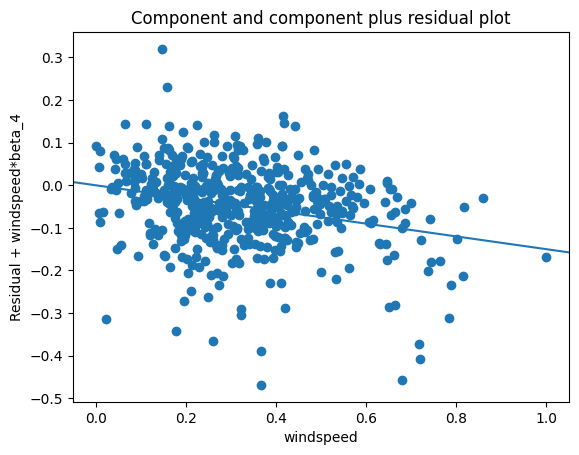

In [67]:
# Validating the linear relationship between predictors and target using CCPR plot
# Component and Component Plus Residual plot for each predictor

# CCPR plot for 'temp' to visualize its linear relationship with the target variable
sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()

# CCPR plot for 'sep' to visualize its linear relationship with the target variable
sm.graphics.plot_ccpr(lr_3, 'sep')
plt.show()

# CCPR plot for 'windspeed' to visualize its linear relationship with the target variable
sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

##### Linearity can be observed from above visualizations.

#### Homoscedasticity

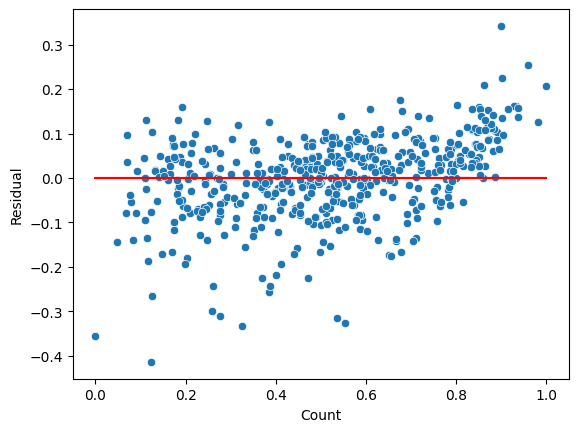

In [68]:
# Predicting the target variable using the trained model
y_train_pred = lr_3.predict(X_train_lm_3)

# Calculating the residuals (difference between actual and predicted values)
residual = y_train - y_train_pred

# Plotting the residuals to check for any patterns
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')  # Adding a reference line at zero residuals
plt.xlabel('Count')  # Labeling the X-axis as Count (Actual values)
plt.ylabel('Residual')  # Labeling the Y-axis as Residual (Error term)
plt.show() 

##### No visible pattern observed from above plot for residuals.

## Step-5: Predictions and Evaluation of the Test Set

In [69]:
# Selecting numerical features for scaling
scale_features = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Applying the trained scaler to the test dataset to maintain consistency with training data
bike_data_test[scale_features] = scaler.transform(bike_data_test[scale_features])

# Displaying the first few rows of the scaled test dataset
bike_data_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [70]:
# Display summary statistics of the test dataset
bike_data_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Separating the target variable from the test dataset
y_test = bike_data_test.pop('cnt')  # Extract the dependent variable
X_test = bike_data_test  # Remaining features for testing

In [72]:
# Ensuring test dataset has the same feature columns as the trained model
selected_features = X_train_new.columns  
X_test = X_test[selected_features]  

# Adding a constant term to the test dataset for the regression model
X_test_lm_3 = sm.add_constant(X_test)  

In [73]:
# Making predictions on the test dataset using the trained regression model
y_pred = lr_3.predict(X_test_lm_3)

In [74]:
# Calculating the R-squared value to evaluate the model's performance on the test data
r2 = r2_score(y_test, y_pred)

# Rounding the R-squared value to four decimal places for better readability
round(r2, 4)

0.8042

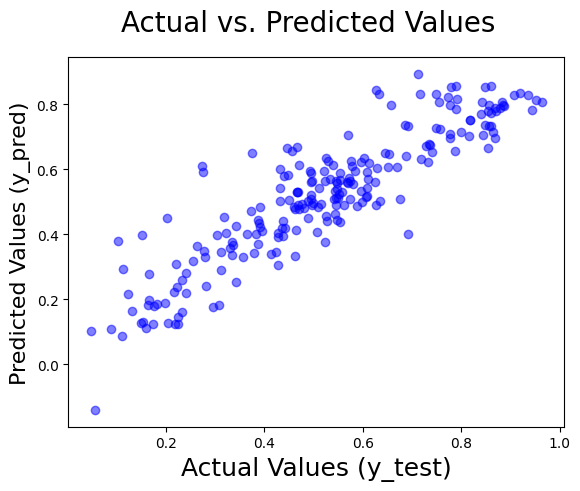

In [75]:
# Visualizing the relationship between actual and predicted values  
fig = plt.figure()  
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)  # Scatter plot of actual vs. predicted values  
fig.suptitle('Actual vs. Predicted Values', fontsize=20)  # Title for the plot  
plt.xlabel('Actual Values (y_test)', fontsize=18)  # X-axis label  
plt.ylabel('Predicted Values (y_pred)', fontsize=16)  # Y-axis label  
plt.show()  # Display the plot  

In [76]:
# Rounding the model coefficients to 4 decimal places for better readability  
lr_3.params.round(4) 

const             0.1874
year              0.2346
holiday          -0.0930
temp              0.4790
windspeed        -0.1501
sep               0.0909
sat               0.0195
Light_snowrain   -0.2855
Misty            -0.0788
spring           -0.0552
summer            0.0625
winter            0.0945
dtype: float64

#### Final Regression Equation  

We can see that the equation of our best-fitted line is:  


\begin{aligned}  
\text{cnt} &= 0.1874 + (0.2346 \times \text{year}) - (0.0930 \times \text{holiday}) + (0.4790 \times \text{temp}) - (0.1501 \times \text{windspeed}) \\ 
&\quad + (0.0909 \times \text{sep}) + (0.0195 \times \text{sat}) - (0.2855 \times \text{Light\_snowrain}) - (0.0788 \times \text{Misty}) \\  
&\quad - (0.0552 \times \text{spring}) + (0.0625 \times \text{summer}) + (0.0945 \times \text{winter})  
\end{aligned}

This equation represents the relationship between the dependent variable (**cnt**) and the predictor variables.


In [77]:
# Compute the Adjusted R-squared value for the test dataset  
# This metric adjusts R-squared by considering the number of predictors in the model  

adjusted_r2 = round(1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1), 4)  
print(adjusted_r2)  # Display the Adjusted R-squared value

0.7939


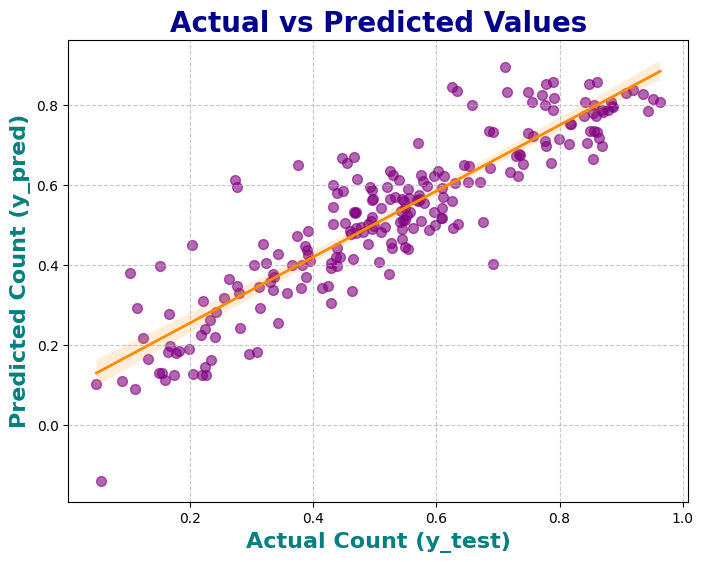

In [78]:
# Visualizing model performance on the test dataset  
# Regression plot for actual vs predicted values  

plt.figure(figsize=(8, 6))  
sns.regplot(x=y_test, y=y_pred, ci=95, fit_reg=True,  
            scatter_kws={"color": "purple", "alpha": 0.6, "s": 50},  # Purple scatter points with transparency  
            line_kws={"color": "darkorange", "linewidth": 2})  # Dark orange regression line  

plt.title('Actual vs Predicted Values', fontsize=20, fontweight='bold', color='darkblue')  
plt.xlabel('Actual Count (y_test)', fontsize=16, fontweight='bold', color='teal')  
plt.ylabel('Predicted Count (y_pred)', fontsize=16, fontweight='bold', color='teal')  
plt.grid(True, linestyle='--', alpha=0.7)  # Adding a light dashed grid  
plt.show()  

## Conclusion  

The model demonstrates strong predictive capability, with a well-balanced performance across the training and test datasets, suggesting minimal overfitting.  

- **Training Set Performance:**  
  - \( R^2 \) Score: **0.834**  
  - Adjusted \( R^2 \) Score: **0.830**  

- **Test Set Performance:**  
  - \( R^2 \) Score: **0.8042**  
  - Adjusted \( R^2 \) Score: **0.7939**  

The results indicate that bike demand is significantly influenced by the following factors:  

- **Temporal Factors:** Year, September (sep), Saturday (sat)
- **Weather Conditions:** Temperature (temp), Wind Speed (windspeed), Light Snow/Rain, Misty
- **Seasonality:** Spring, Summer, Winter
- **Holiday Effect:** Holidays negatively impact demand

This analysis highlights the key variables that affect bike demand and can help optimize forecasting models.  
